**Library Imports**

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

In [2]:
import os
import sys
print(sys.version)   # Python version information

3.4.4 |Anaconda 2.4.0 (64-bit)| (default, Jan 11 2016, 13:54:01) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


In [3]:
from sympy import *  # Symbolic mathematics
import sympy

In [4]:
import numpy as np   # N-Dimensional arrays and numerical routines
import pandas as pd  # Data structures and data analysis tools
import scipy         # Numerical routines

In [5]:
#import numba        # Decorators for speeding up python functions

In [6]:
#from astropy import constants  # Physical Constants
#from astropy import units      # Physical Units

In [7]:
import matplotlib as mpl  # Standard plotting library
import matplotlib.pyplot as plt 
import seaborn as sns     # Statistical plotting and improved plot style
#import bokeh             # Interactive visualization library

In [8]:
from sympy.utilities.autowrap import ufuncify  # Creates numerical methods 
                                               # from symbolic expressions

In [9]:
from sympy import abc       # Symbolic variables
from sympy import pi as Pi  # Symbolic pi
from sympy import I as I    # Symbolic imaginary unit

**Display**

In [10]:
from IPython.display import display

In [11]:
from IPython.display import set_matplotlib_formats  
set_matplotlib_formats('pdf', 'png')

In [12]:
import ipywidgets

**Settings & Options**

In [13]:
np.set_printoptions(precision=5, threshold=1000, edgeitems=3, linewidth=75, 
                    suppress=False, nanstr=None, infstr=None, 
                    formatter=None)

In [14]:
pandas_options = {'display.chop_threshold': None,
                  'display.precision': 4,
                  'display.max_columns': 8,
                  'display.max_rows': 8,
                  'display.max_info_columns': 8,
                  'display.max_info_rows': 8}
for key, val in pandas_options.items():
    pd.set_option(key, val)

In [15]:
sympy.interactive.printing.init_printing(use_latex='mathjax')

In [16]:
# os.system('ipython nbconvert --to pdf {filename}.ipynb')

**Resources**

- [Simulating dynamical features of escape panic](http://www.nature.com/nature/journal/v407/n6803/full/407487a0.html)

- [Patient and impatient pedestrians in a spatial game for egress congestion](http://journals.aps.org/pre/abstract/10.1103/PhysRevE.87.012802)

- [Power Law](http://motion.cs.umn.edu/PowerLaw/)

- [Universal Power Law Governing Pedestrian Interactions](http://journals.aps.org/prl/abstract/10.1103/PhysRevLett.113.238701)


# Scratch

In [ ]:
%matplotlib inline

In [ ]:
arr = np.random.normal(loc=0.22, scale=0.01, size=100)
arr

In [ ]:
arr = np.random.normal(loc=70, scale=10,size=100)
arr

In [ ]:
arr -= arr.min()

In [ ]:
arr /= arr.max()

In [ ]:
plt.hist(arr, bins=10);

In [ ]:
arr.sort()

In [ ]:
plt.plot(np.arange(arr.size), arr);

# Numba

In [ ]:
from bokeh.plotting import *

In [ ]:
output_notebook()

In [ ]:
import numba

In [ ]:
position = np.random.uniform(size=400)
position = position.reshape((arr.size // 2, 2))

In [ ]:
p = figure()
p.circle(x=position[:, 0], y=position[:, 1])
show(p)

In [ ]:
from collections import OrderedDict

spec = OrderedDict(
    center=numba.float64[:],
    radius=numba.float64[:],
)

@numba.jitclass(spec)
class GoalRectangle(object):
    def __init__(self, center, radius):
        # Vectors of shape=(2,)
        self.center = center    # (x, y)
        self.radius = radius    # (rx, ry)

    def contains(self, position):
        condition = (position - self.center) < self.radius
        return condition[:, 0] & condition[:, 1]


In [ ]:
goal = GoalRectangle(np.array((0.0, 0.0)), 
                     np.array((0.5, 0.7)))

In [ ]:
mask = goal.contains(position)

In [ ]:
p = figure()
p.circle(x=position[mask][:, 0], y=position[mask][:, 1])
show(p)

In [ ]:
np.zeros(10, dtype=np.bool)

In [ ]:
numba.typeof(np.array((1, 1)))

In [ ]:
numba.types.UniTuple(numba.int64, 2)

In [ ]:
numba.boolean[:]

In [ ]:
@numba.jit(nopython=True)
def foo(arr, b):
    return arr[b]

In [ ]:
foo(np.array((1, 2, 3, 4)), np.array((True, )))

In [ ]:
numba.typeof(np.array((True, )))

In [ ]:
np.array((False, True), np.bool) ^ True

# plt

In [18]:
%matplotlib inline

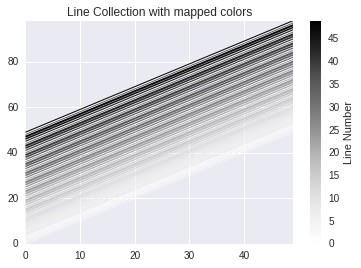

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.collections import LineCollection

# In order to efficiently plot many lines in a single set of axes,
# Matplotlib has the ability to add the lines all at once. Here is a
# simple example showing how it is done.

N = 50
x = np.arange(N)
# Here are many sets of y to plot vs x
ys = [x + i for i in x]

# We need to set the plot limits, they will not autoscale
ax = plt.axes()

ax.set_xlim((np.amin(x), np.amax(x)))
ax.set_ylim((np.amin(np.amin(ys)), np.amax(np.amax(ys))))

# colors is sequence of rgba tuples
# linestyle is a string or dash tuple. Legal string values are
#          solid|dashed|dashdot|dotted.  The dash tuple is (offset, onoffseq)
#          where onoffseq is an even length tuple of on and off ink in points.
#          If linestyle is omitted, 'solid' is used
# See matplotlib.collections.LineCollection for more information

# Make a sequence of x,y pairs
line_segments = LineCollection([list(zip(x, y)) for y in ys],
                               linewidths=(0.5, 1, 1.5, 2),
                               linestyles='solid')
line_segments.set_array(x)
ax.add_collection(line_segments)
fig = plt.gcf()
axcb = fig.colorbar(line_segments)
axcb.set_label('Line Number')
ax.set_title('Line Collection with mapped colors')
plt.sci(line_segments)  # This allows interactive changing of the colormap.
plt.show()

In [27]:
?LineCollection

In [31]:
linear_params = np.array(
    (
        ((0, 0), (0, 50)), 
        ((0, 0), (50, 0)), 
        ((0, 50), (50, 50)),
        ((50, 0), (50, 24)), 
        ((50, 26), (50, 50)),
    ),
    dtype=np.float64
)

In [30]:
LineCollection([((0, 1), (1, 2))])

In [32]:
LineCollection(linear_params)